#Aprendizaje Supervisado

###**Modelos Subentrenado / Sobreentrenado / Mejor ajuste**

Luis Eduardo Falcón Morales

#**Subentrenado**

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, 
                           n_features=20, 
                           flip_y=0.2, 
                           random_state=17) 

print(X.shape, y.shape)

(1000, 20) (1000,)


In [ ]:
X[0:2,:]

array([[ 0.30720761,  0.78851574,  1.57775826, -0.83782462, -1.9092439 ,
        -0.52486904, -0.59594565, -1.35986902,  1.10949158, -1.87040312,
         2.0555414 , -0.1644116 ,  0.05467622, -1.00918284, -1.89062424,
         0.27800919,  0.30241122, -0.38344902, -0.57919446, -1.37604018],
       [-1.53627982,  0.12338025,  0.07355866,  0.09005639, -0.58258365,
         0.32100129,  2.6984525 ,  0.31212436,  0.29067048,  1.77439268,
        -1.39129642,  0.22318237,  2.34097438, -1.30102918,  1.07591658,
         0.38101488,  0.3963937 ,  0.87694313,  0.29912412,  2.42462292]])

In [ ]:
y[0:10]

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.6, 
                                                    random_state=11) 


print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(600, 20) (400, 20) (600,) (400,)


In [ ]:
neuronas = [i for i in range(1, 50, 5)]

print(neuronas)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]


In [ ]:
from sklearn.neural_network import MLPClassifier
import numpy as np

In [ ]:
train_scores, test_scores = list(), list()

train_errors, test_errors = list(), list()


for i in neuronas:

  model = MLPClassifier(hidden_layer_sizes=(i,i), 
                        max_iter=3000, 
                        alpha=50, 
                        random_state=42)

  model.fit(X_train, y_train)


  # Predicciones y métricas con el conjunto de entrenamiento:
  train_yhat = model.predict(X_train)

  train_loss =  np.mean(abs(y_train - train_yhat))   
  train_errors.append(train_loss)

  train_acc = 1 - train_loss
  train_scores.append(train_acc)

  

  # Predicciones y métricas con el conjunto de prueba:
  test_yhat = model.predict(X_test)
  
  test_loss = np.mean(abs(y_test - test_yhat))
  test_errors.append(test_loss)

  test_acc = 1 - test_loss
  test_scores.append(test_acc)



  # evolución de las métricas durante el entrenamiento ...
  print('> %d...\t trainacc: %.3f, testacc: %.3f, trainloss: %.3f, testloss: %.3f' 
        % (i, train_acc, test_acc, train_loss, test_loss))

> 1...	 trainacc: 0.518, testacc: 0.500, trainloss: 0.482, testloss: 0.500
> 6...	 trainacc: 0.518, testacc: 0.500, trainloss: 0.482, testloss: 0.500
> 11...	 trainacc: 0.518, testacc: 0.500, trainloss: 0.482, testloss: 0.500
> 16...	 trainacc: 0.518, testacc: 0.500, trainloss: 0.482, testloss: 0.500
> 21...	 trainacc: 0.518, testacc: 0.500, trainloss: 0.482, testloss: 0.500
> 26...	 trainacc: 0.518, testacc: 0.500, trainloss: 0.482, testloss: 0.500
> 31...	 trainacc: 0.518, testacc: 0.500, trainloss: 0.482, testloss: 0.500
> 36...	 trainacc: 0.518, testacc: 0.500, trainloss: 0.482, testloss: 0.500
> 41...	 trainacc: 0.518, testacc: 0.500, trainloss: 0.482, testloss: 0.500
> 46...	 trainacc: 0.518, testacc: 0.500, trainloss: 0.482, testloss: 0.500


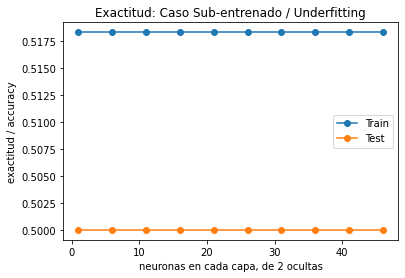

In [ ]:
import matplotlib.pyplot as plt 

plt.plot(neuronas, train_scores, '-o', label='Train')
plt.plot(neuronas, test_scores, '-o', label='Test')
plt.legend()
plt.title('Exactitud: Caso Sub-entrenado / Underfitting')
plt.xlabel('neuronas en cada capa, de 2 ocultas')
plt.ylabel('exactitud / accuracy')
plt.show()

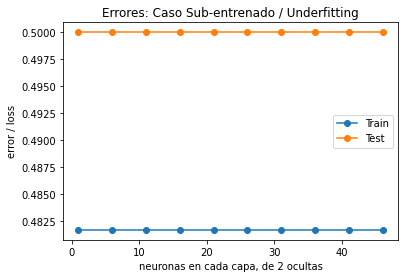

In [ ]:
plt.plot(neuronas, train_errors, '-o', label='Train')
plt.plot(neuronas, test_errors, '-o', label='Test')
plt.legend()
plt.title('Errores: Caso Sub-entrenado / Underfitting')
plt.xlabel('neuronas en cada capa, de 2 ocultas')
plt.ylabel('error / loss')
plt.show()

#**Sobreentrenado**

In [ ]:
X, y = make_classification(n_samples=1000, n_features=20, flip_y=0.3, random_state=17)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=11)

neuronas = [i for i in range(1, 50, 5)]

In [ ]:
train_scores, test_scores = list(), list()
train_errors, test_errors = list(), list()

for i in neuronas:

  model = MLPClassifier(hidden_layer_sizes=(i,i), 
                        max_iter=3000, 
                        alpha=0.15, 
                        random_state=42) 

  model.fit(X_train, y_train)

  # TRAIN set
  train_yhat = model.predict(X_train)
  
  train_loss = np.mean(abs(y_train - train_yhat))
  train_errors.append(train_loss)

  train_acc = 1 - train_loss
  train_scores.append(train_acc)


  # TEST set
  test_yhat = model.predict(X_test)

  test_loss =  np.mean(abs(y_test - test_yhat)) 
  test_errors.append(test_loss)
  
  test_acc = 1 - test_loss
  test_scores.append(test_acc)


  # progreso de las épocas del entrenamiento ...
  print('>%d, train: %.3f, test: %.3f, losstrain: %.3f, losstest: %.3f' % (i, train_acc, test_acc, train_loss, test_loss))

>1, train: 0.520, test: 0.515, losstrain: 0.480, losstest: 0.485
>6, train: 0.833, test: 0.740, losstrain: 0.168, losstest: 0.260
>11, train: 0.921, test: 0.675, losstrain: 0.079, losstest: 0.325
>16, train: 0.995, test: 0.715, losstrain: 0.005, losstest: 0.285
>21, train: 1.000, test: 0.675, losstrain: 0.000, losstest: 0.325
>26, train: 1.000, test: 0.690, losstrain: 0.000, losstest: 0.310
>31, train: 1.000, test: 0.710, losstrain: 0.000, losstest: 0.290
>36, train: 1.000, test: 0.700, losstrain: 0.000, losstest: 0.300
>41, train: 1.000, test: 0.690, losstrain: 0.000, losstest: 0.310
>46, train: 1.000, test: 0.705, losstrain: 0.000, losstest: 0.295


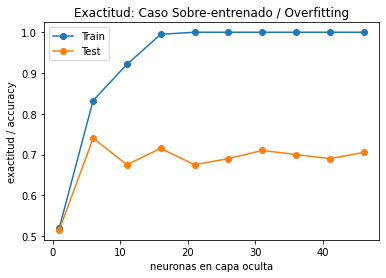

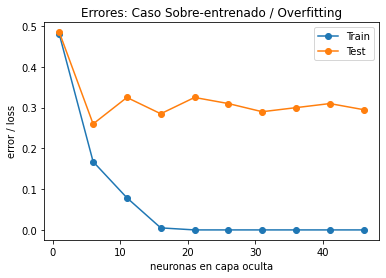

In [ ]:
import matplotlib.pyplot as plt 

plt.plot(neuronas, train_scores, '-o', label='Train')
plt.plot(neuronas, test_scores, '-o', label='Test')
plt.legend()
plt.title('Exactitud: Caso Sobre-entrenado / Overfitting')
plt.xlabel('neuronas en capa oculta')
plt.ylabel('exactitud / accuracy')
plt.show()

plt.plot(neuronas, train_errors, '-o', label='Train')
plt.plot(neuronas, test_errors, '-o', label='Test')
plt.legend()
plt.title('Errores: Caso Sobre-entrenado / Overfitting')
plt.xlabel('neuronas en capa oculta')
plt.ylabel('error / loss')
plt.show()

#**Mejor ajuste**

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=10000, 
                           n_features=20, 
                           flip_y=0.2, 
                           random_state=17)  

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.6, 
                                                    random_state=11) 

neuronas = [i for i in range(1, 50, 5)]

In [ ]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt 


In [ ]:

train_scores, test_scores = list(), list()
train_errors, test_errors = list(), list()

for i in neuronas:

  model = MLPClassifier(hidden_layer_sizes=(i,i), 
                        max_iter=1000, 
                        alpha=0.7, 
                        random_state=42) 

  model.fit(X_train, y_train)

  # TRAIN set
  train_yhat = model.predict(X_train)

  train_loss = np.mean(abs(y_train - train_yhat))
  train_errors.append(train_loss)

  train_acc = 1 - train_loss
  train_scores.append(train_acc)


  # TEST set
  test_yhat = model.predict(X_test)

  test_loss = np.mean(abs(y_test - test_yhat))
  test_errors.append(test_loss)

  test_acc = 1 - test_loss
  test_scores.append(test_acc)


  # progreso de las épocas del entrenamiento ...
  print('>%d, train: %.3f, test: %.3f, losstrain: %.3f, losstest: %.3f' % (i, train_acc, test_acc, train_loss, test_loss))

>1, train: 0.502, test: 0.506, losstrain: 0.498, losstest: 0.494
>6, train: 0.871, test: 0.871, losstrain: 0.130, losstest: 0.129
>11, train: 0.871, test: 0.871, losstrain: 0.129, losstest: 0.129
>16, train: 0.873, test: 0.870, losstrain: 0.127, losstest: 0.130
>21, train: 0.873, test: 0.869, losstrain: 0.127, losstest: 0.131
>26, train: 0.874, test: 0.873, losstrain: 0.126, losstest: 0.127
>31, train: 0.876, test: 0.868, losstrain: 0.124, losstest: 0.132
>36, train: 0.877, test: 0.868, losstrain: 0.123, losstest: 0.132
>41, train: 0.877, test: 0.865, losstrain: 0.123, losstest: 0.135
>46, train: 0.876, test: 0.865, losstrain: 0.124, losstest: 0.135


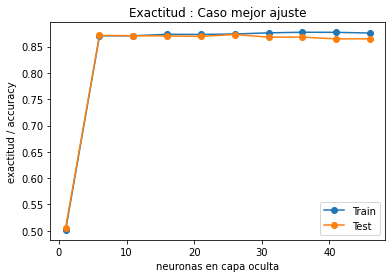

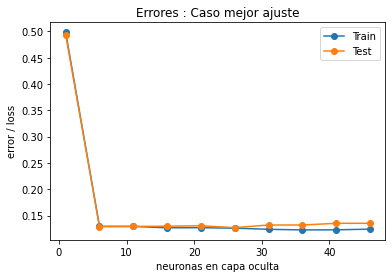

In [ ]:
plt.plot(neuronas, train_scores, '-o', label='Train')
plt.plot(neuronas, test_scores, '-o', label='Test')
plt.legend()
plt.title('Exactitud : Caso mejor ajuste')
plt.xlabel('neuronas en capa oculta')
plt.ylabel('exactitud / accuracy')
plt.show()


plt.plot(neuronas, train_errors, '-o', label='Train')
plt.plot(neuronas, test_errors, '-o', label='Test')
plt.legend()
plt.title('Errores : Caso mejor ajuste')
plt.xlabel('neuronas en capa oculta')
plt.ylabel('error / loss')
plt.show()